In [8]:
import pandas as pd
import plotly.graph_objects as gp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
tit=pd.read_csv("allTitanic.csv")
tit.head()

,Unnamed: 0,Name,Age,Boarded,Position,Lifeboat,Body,Sex,Class,Group,Survived,ID,Adult
0,1,Mr. George Swane,19.0,S,chauffeur,NaN,294MB,m,2,1classServ,False,1,True
1,2,"Miss Amelia Mary ""Mildred"" Brown",18.0,S,cook,11,NaN,f,2,1classServ,True,2,True
2,3,Miss Sarah Daniels,33.0,S,maid,8,NaN,f,1,1classServ,True,3,True
3,4,Miss Alice Catherine Cleaver,22.0,S,nurse,11,NaN,f,1,1classServ,True,4,True
4,5,Miss Rosalie Bidois,46.0,C,maid,4,NaN,f,1,1classServ,True,5,True


*Triem representar els salvats del Titanic segon el grup.<br>
Llegim les dades de la Wikipedia en dues adreces URL:<br>
https://en.wikipedia.org/wiki/Passengers_of_the_Titanic<br>
https://en.wikipedia.org/wiki/Crew_of_the_Titanic<br>
que hem tractat conjuntament en un treball previ recollit en un repositori d'ac-uoc de Github,<br>
recollit al fitxer conjunt allTitanic.csv*

In [134]:
print('Gent a bord:',tit.Name.count())
titg=tit.groupby('Group').count()

Gent a bord: 2177


*La matriu de punts volem que representi el percentatge de cada u dels grups de l'exercici 1 respecte al total*

In [125]:
titg['%gent']=100*titg.Name/2177
df=titg.sort_values(by='%gent',ascending=False)
gent=pd.Series(df['%gent'])
gent=round(gent)
gent=gent[gent > 0]
gent=gent.astype(int)
alt = pd.Series(1, index=["altres"])
gent=gent.append(alt)

In [137]:
print('Percentatge arrodonit dels grups:\n')
print(gent)

Percentatge arrodonit dels grups:

3class         33
Victualling    18
Engineering    15
2class         13
1c0ser         11
restaurant      3
Deck            3
1classServ      2
1c1serv         1
altres          1
dtype: int64


*Esquema de la matriu: 10x10 punts:*

In [138]:
xind=np.repeat(np.arange(1,11),10)
yind=np.tile(np.arange(1,11),10)
farbe=['#0000ff','#c0c0c0','#dc14c3','#ff00ff','#dda0dd','#ff0000','#f000ff','#a0522d','#ffa500','#00ffff']

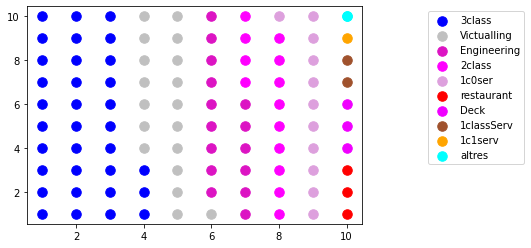

In [132]:
k=0
for i in range(len(gent)):
        plt.scatter(xind[k:k+gent[i]],yind[k:k+gent[i]],c=farbe[i],s=90)
        k=k+gent[i]
plt.scatter(xind[99],yind[99],c='#00ffff',s=90)
plt.legend(gent.index,bbox_to_anchor=(1.5,1))
plt.show()